EDA

#Import Module

In [106]:
import numpy as np
import pandas as pd

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

plt.style.use("seaborn") #그래프 모양 설정
%matplotlib inline

In [108]:
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [109]:
df_train = pd.read_csv("train.csv") #데이터 로드
df_train.head()

PassengerId  Pclass  ... Embarked Survived
0            1       3  ...        S        0
1            2       1  ...        C        1
2            3       3  ...        S        1
3            4       1  ...        S        1
4            5       3  ...        S        0

[5 rows x 12 columns]

In [110]:
df_train.shape #데이터프레임의 행/열 개수

(891, 12)

In [111]:
df_train.describe() #각 컬럼의 개수, 평균, 표준편차 등의 값 출력

PassengerId      Pclass         Age  ...       Parch        Fare    Survived
count   891.000000  891.000000  714.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118  ...    0.381594   32.204208    0.383838
std     257.353842    0.836071   14.526497  ...    0.806057   49.693429    0.486592
min       1.000000    1.000000    0.420000  ...    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000  ...    0.000000    7.910400    0.000000
50%     446.000000    3.000000   28.000000  ...    0.000000   14.454200    0.000000
75%     668.500000    3.000000   38.000000  ...    0.000000   31.000000    1.000000
max     891.000000    3.000000   80.000000  ...    6.000000  512.329200    1.000000

[8 rows x 7 columns]

In [112]:
len(df_train) #데이터프레임의 행 개수 출력

891

## 결측치 확인

In [113]:
df_train.isnull().sum() #각 컬럼의 null 값(결측치) 개수 조회

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [114]:
df_train.isnull().sum() / len(df_train) #각 컬럼 결측치 비율 조회

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Survived       0.000000
dtype: float64

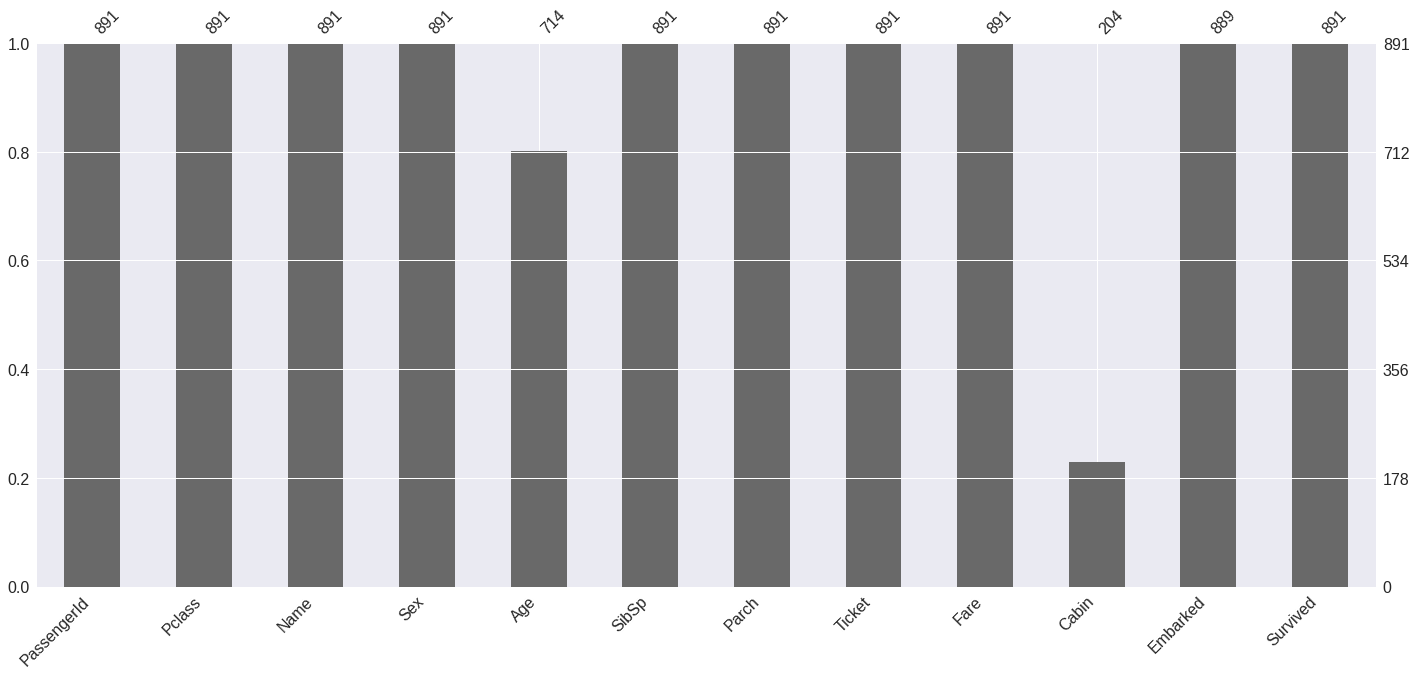

In [115]:
import missingno as msno
msno.bar(df = df_train) #각 컬럼의 결측치가 아닌 데이터의 비율을 그래프화

* 결측치 비율 < 10% 인 경우, 해당 행 삭제 또는 **다른 값** 대입
  * 이상치가 거의 없는 경우, '평균' 대입
  * 이상치가 있는 경우, '중앙값' 대입
  * 결측치를 예측해 대입

* 10% =< 결측치 비율 < 75% 인 경우, 다른 값 대입
* 75% =< 결측치 비율인 경우, 해당 컬럼 삭제

## 결측치 대체

In [116]:
df = pd.DataFrame({
    "pocket_money" : [30, 10, 50, 100, 200]
})
df

pocket_money
0            30
1            10
2            50
3           100
4           200

In [117]:
print("평균: ", df.mean())
print("중앙값: ", df.median())
print("이상치가 없을 경우, 평균과 중앙값이 비슷함")

평균:  pocket_money    78.0
dtype: float64
중앙값:  pocket_money    50.0
dtype: float64
이상치가 없을 경우, 평균과 중앙값이 비슷함


In [118]:
#이상치 1. 잘못된 입력

In [119]:
#이상치 2. 95% 범위에 해당하지 않는 경우
#워렌 버핏의 용돈을 추가한다면?
df.loc[5, "pocket_money"] = 500000
df

pocket_money
0          30.0
1          10.0
2          50.0
3         100.0
4         200.0
5      500000.0

In [120]:
print("평균: ", df.mean())
print("중앙값: ", df.median())
print("평균은 이상치에 민감하게 영향을 받음")

평균:  pocket_money    83398.333333
dtype: float64
중앙값:  pocket_money    75.0
dtype: float64
평균은 이상치에 민감하게 영향을 받음


# 'Survived' 와 관련 있는 컬럼 탐색

In [121]:
df_train["Survived"].value_counts() #사망자(0), 생존자(1)

0    549
1    342
Name: Survived, dtype: int64

## 'Pclass' 컬럼과의 관계

In [122]:
df_train["Pclass"].value_counts() #좌석 등급별 탑승객 수

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [123]:
df_train[df_train["Survived"] == 1] #생존자인 행의 데이터만 조회

PassengerId  Pclass  ... Embarked Survived
1              2       1  ...        C        1
2              3       3  ...        S        1
3              4       1  ...        S        1
8              9       3  ...        S        1
9             10       2  ...        C        1
..           ...     ...  ...      ...      ...
875          876       3  ...        C        1
879          880       1  ...        C        1
880          881       2  ...        S        1
887          888       1  ...        S        1
889          890       1  ...        C        1

[342 rows x 12 columns]

In [124]:
df_train[df_train["Survived"] == 1]["Pclass"].value_counts() #좌석 등급별 생존자 수

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [125]:
pd.crosstab(df_train["Pclass"], df_train["Survived"], margins = True)

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

## 'Sex' 컬럼과의 관계

In [126]:
pd.crosstab(df_train["Sex"], df_train["Survived"], margins = True)

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

In [127]:
df_train[(df_train["Sex"] == "female") & (df_train["Pclass"] == 1)] #여성이면서 1등급 좌석에 탑승한 사람

PassengerId  Pclass  ... Embarked Survived
1              2       1  ...        C        1
3              4       1  ...        S        1
11            12       1  ...        S        1
31            32       1  ...        C        1
52            53       1  ...        C        1
..           ...     ...  ...      ...      ...
856          857       1  ...        S        1
862          863       1  ...        S        1
871          872       1  ...        S        1
879          880       1  ...        C        1
887          888       1  ...        S        1

[94 rows x 12 columns]

In [128]:
df_train[
         (df_train["Sex"] == "female") &
         (df_train["Pclass"] == 1)
         ]["Survived"].sum() #여성이면서 1등급 좌석에 탑승한 생존자의 수

91

In [129]:
df_train[
         (df_train["Sex"] == "female") &
         (df_train["Pclass"] == 1)
         ]["Survived"].sum() / 94 #비율 구하기

0.9680851063829787

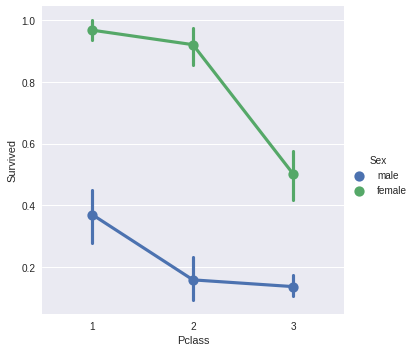

In [130]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = df_train) #성별, 좌석 등급을 기준으로 생존자의 비율 시각화

## 'Age' 컬럼과의 관계

In [131]:
survived_age = df_train["Age"][df_train["Survived"] == 1] #생존자 나이
survived_age

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [132]:
survived_age.sort_values(ascending = False)

630    80.0
275    63.0
483    63.0
829    62.0
570    62.0
       ... 
727     NaN
740     NaN
828     NaN
839     NaN
849     NaN
Name: Age, Length: 342, dtype: float64

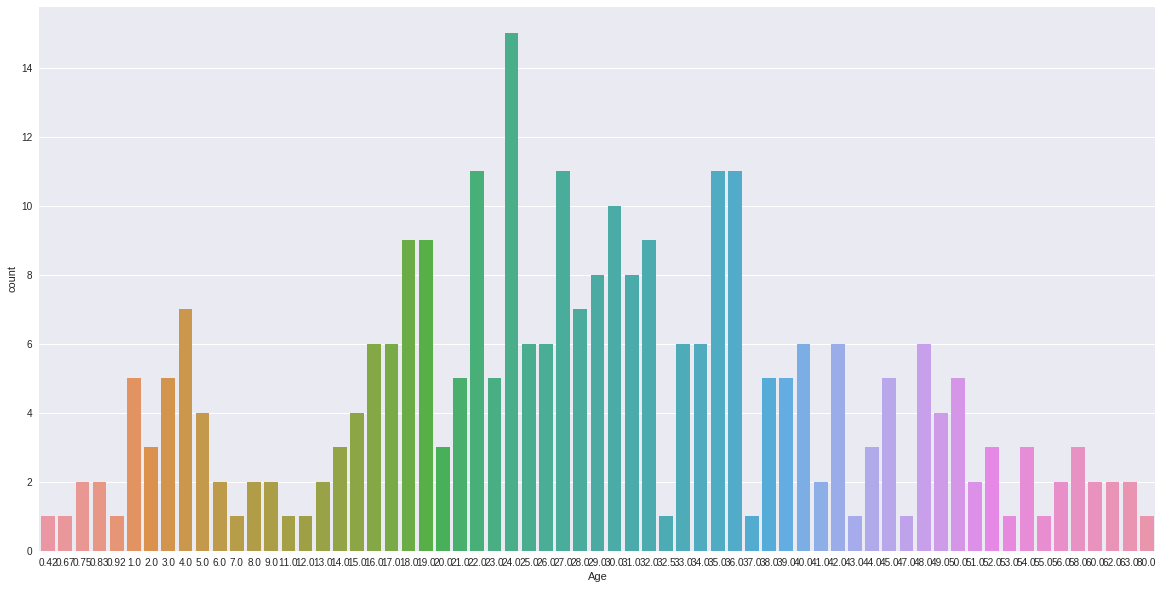

In [133]:
plt.figure(figsize = (20,10)) 
sns.countplot(x = "Age", data = pd.DataFrame(survived_age)) #나이별 생존자의 수 시각화

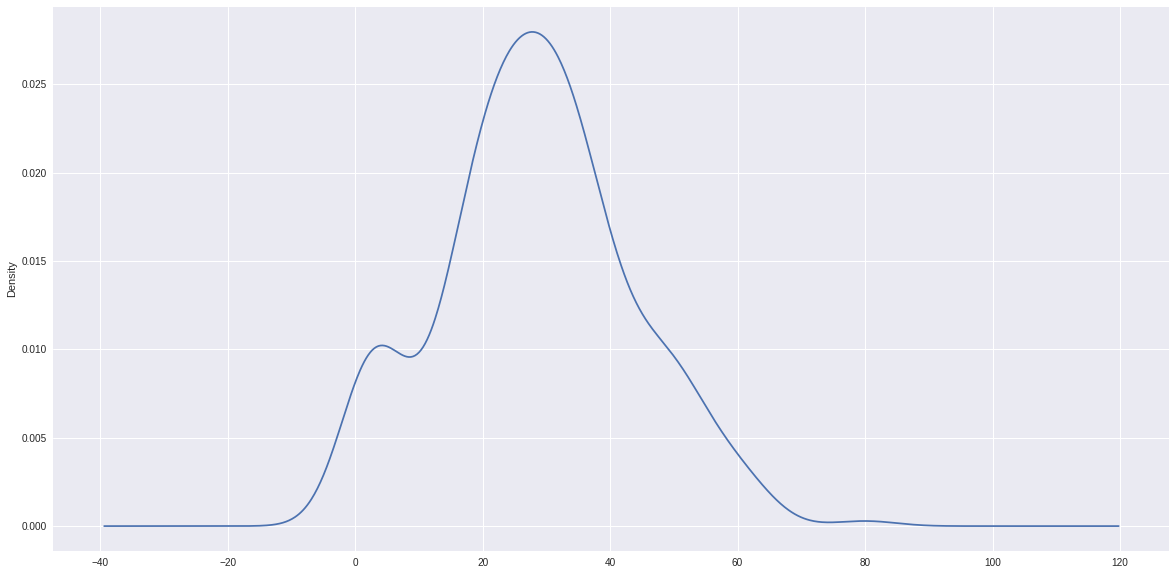

In [134]:
plt.figure(figsize = (20,10)) 
survived_age.plot(kind = "kde")

In [135]:
dead_age = df_train["Age"][df_train["Survived"] == 0] #사망자 나이
dead_age

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

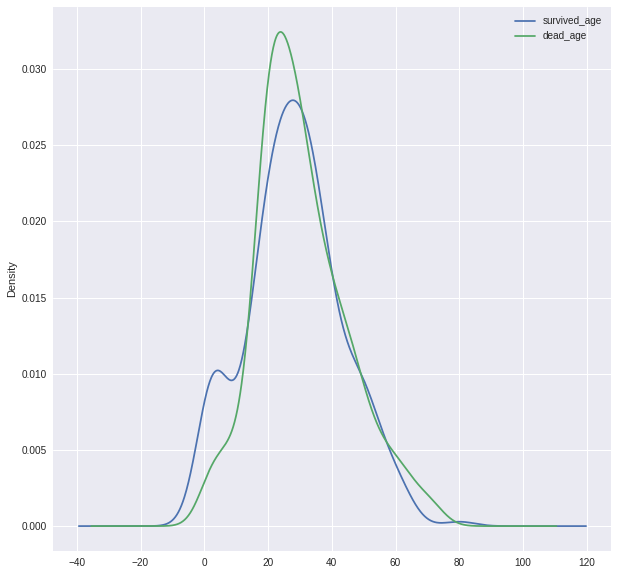

In [136]:
plt.figure(figsize = (10, 10))
survived_age.plot(kind = "kde") #비율을 그래프화
dead_age.plot(kind = "kde")
plt.legend(["survived_age", "dead_age"])

## 'Embarked' 컬럼과의 관계

In [137]:
pd.crosstab(df_train["Embarked"], df_train["Survived"], margins = True)

Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889

In [138]:
pd.crosstab(df_train["Embarked"], df_train["Pclass"], margins = True)

Pclass      1    2    3  All
Embarked                    
C          85   17   66  168
Q           2    3   72   77
S         127  164  353  644
All       214  184  491  889

##상관관계 파악

In [139]:
df_train.corr()["Survived"]

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

## 컬럼의 기울임 정보 파악

In [140]:
df_train.skew() #각 컬럼의 기울어짐 정도(비대칭/데이터가 몰려있는 상태)_4 초과일 경우 기울어졌다 판단

PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Survived       0.478523
dtype: float64

(array([89., 89., 89., 89., 89., 89., 89., 89., 89., 90.]),
 array([  1.,  90., 179., 268., 357., 446., 535., 624., 713., 802., 891.]),
 <a list of 10 Patch objects>)

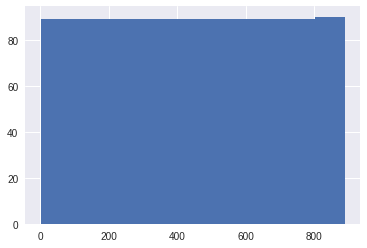

In [141]:
plt.hist(df_train["PassengerId"]) #기울어짐이 0인 컬럼 시각화

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

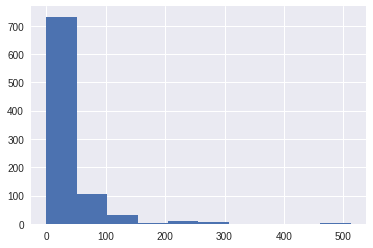

In [142]:
plt.hist(df_train["Fare"]) #가장 기울어진 컬럼 시각화

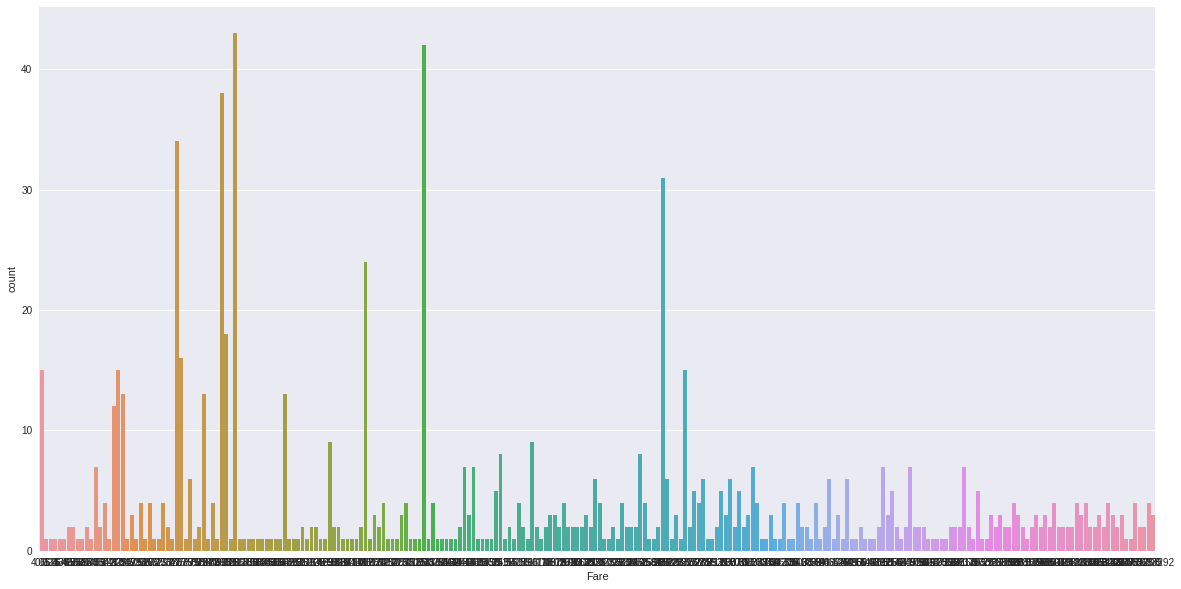

In [143]:
plt.figure(figsize = (20,10)) 
sns.countplot(x = "Fare", data = df_train)

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

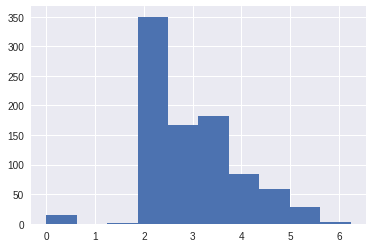

In [144]:
df_train["Fare"] = np.log1p(df_train["Fare"])
plt.hist(df_train["Fare"])

# 전처리

## 'FamilySize' 컬럼 추가
 > 가족과 함께 탑승한 승객과 혼자 탑승한 승객을 비교

In [145]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1

In [146]:
pd.crosstab(df_train["FamilySize"], df_train["Survived"], margins = True)

Survived      0    1  All
FamilySize               
1           374  163  537
2            72   89  161
3            43   59  102
4             8   21   29
5            12    3   15
6            19    3   22
7             8    4   12
8             6    0    6
11            7    0    7
All         549  342  891

## 'Sir' 컬럼 추가
> 성별과 나이를 나타내는 컬럼

* 이름에서 여자일 경우, 미혼(Miss) < 기혼(Mrs)
* 남자일 경우, Mr, Master

In [147]:
name_list = df_train["Name"].tolist()
name_list

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [148]:
import re
#괄호 안의 단어 중 하나를 포함하는 문자열 찾기
p = re.compile("Mrs|Mr|Miss|Master|Don|Dr|Ms|Major|Mlle|Mme|Countess|Lady|Don|Countess")

[참고 1](https://python.bakyeono.net/chapter-11-2.html)
[참고 2](http://egloos.zum.com/sweeper/v/3065126)

In [149]:
#정석적으로 사용하면, 
a = p.search('Dooley, Mr. Patrick') #string에서 pattern과 매치하는 텍스트를 탐색(매치한다: Match 객체 반환)
a.group() #매치된 텍스트를 하나의 문자열(str)로 반환.

'Mr'

In [150]:
p.search('Dooley, Mr. Patrick')

<_sre.SRE_Match object; span=(8, 10), match='Mr'>

In [151]:
p.search('Dooley, Mr. Patrick').group() #이렇게 사용하는데 

'Mr'

In [152]:
p.search('Dooley, Mr. Patrick')[0] #.group() 함수 대신 [0] 인덱스로 표현 가능

'Mr'

In [153]:
for name in name_list:
  if p.search(name) != None:
    print(p.search(name)[0]) #p에 대입된 문자열과 name 일치하는 문자열을 반환
  else:
    print("Other")

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Dr
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Dr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Other
Other
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Miss
Mrs
Mr
Other
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Miss
M

In [154]:
sir = []
for name in name_list:
  if p.search(name) != None:
    if p.search(name)[0] in ["Countess", "Lady", "Mrs"]:
      sir.append("Mrs")
    elif p.search(name)[0] in ["Mme", "Ms", "Mlle"]:
      sir.append("Miss")
    elif p.search(name)[0] in ["Don", "Dr", "Major"]:
      sir.append("Mr")
    else:
      sir.append(p.search(name)[0])
  else:
    sir.append("Other")

In [155]:
sir

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr

In [156]:
pd.Series(sir).value_counts()

Mr        530
Miss      185
Mrs       126
Master     40
Other      10
dtype: int64

In [157]:
df_train["Sir"] = pd.Series(sir)
df_train

PassengerId  Pclass  ... FamilySize    Sir
0              1       3  ...          2     Mr
1              2       1  ...          2    Mrs
2              3       3  ...          1   Miss
3              4       1  ...          2    Mrs
4              5       3  ...          1     Mr
..           ...     ...  ...        ...    ...
886          887       2  ...          1  Other
887          888       1  ...          1   Miss
888          889       3  ...          4   Miss
889          890       1  ...          1     Mr
890          891       3  ...          1     Mr

[891 rows x 14 columns]

In [158]:
pd.crosstab(df_train["Sir"], df_train["Survived"], margins = True)

Survived    0    1  All
Sir                    
Master     17   23   40
Miss       55  130  185
Mr        442   88  530
Mrs        26  100  126
Other       9    1   10
All       549  342  891

# 결측치 처리

## 'Age' 결측치 처리
 > Sir 컬럼의 값을 참조, 같은 Sir 값을 가진 행의 평균값으로 대치

In [159]:
sir_df = df_train.groupby("Sir").mean()

In [160]:
df_train.groupby("Sir").mean()["Age"] #'Age'컬럼의 평균

Sir
Master     4.574167
Miss      21.860000
Mr        32.651589
Mrs       36.000000
Other     48.300000
Name: Age, dtype: float64

In [161]:
df_train.groupby("Sir").mean().loc["Mrs"] #'Sir' 컬럼의 값이 "Mrs"의 평균

PassengerId    456.706349
Pclass           1.984127
Age             36.000000
SibSp            0.690476
Parch            0.817460
Fare             3.485083
Survived         0.793651
FamilySize       2.507937
Name: Mrs, dtype: float64

In [162]:
df_train.groupby("Sir").mean().loc["Mrs"]["Age"] #'Sir' 컬럼의 값이 "Mrs"의 나이 평균

36.0

In [163]:
#'Age' 컬림이 null 인 행의 데이터를 'Sir' 값이 일치하는 행의 평균으로 대치하는 함수 

#'Age' 컬럼이 null 인 행의 인덱스: index
#df_train : df
def process_age_null(index, df):
  row_sir = df.loc[index]["Sir"]
  print("index: ", index, "row_sir: ", row_sir)
  sir_mean = sir_df.loc[row_sir]["Age"]
  print("sir_mean: ", sir_mean)
  df.at[index, "Age"] = sir_mean

In [164]:
age_null_index = df_train.index[df_train["Age"].isnull()]
age_null_index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [165]:
for index in age_null_index:
  process_age_null(index, df_train)

index:  5 row_sir:  Mr
sir_mean:  32.65158924205379
index:  17 row_sir:  Mr
sir_mean:  32.65158924205379
index:  19 row_sir:  Mrs
sir_mean:  36.0
index:  26 row_sir:  Mr
sir_mean:  32.65158924205379
index:  28 row_sir:  Miss
sir_mean:  21.86
index:  29 row_sir:  Mr
sir_mean:  32.65158924205379
index:  31 row_sir:  Mrs
sir_mean:  36.0
index:  32 row_sir:  Miss
sir_mean:  21.86
index:  36 row_sir:  Mr
sir_mean:  32.65158924205379
index:  42 row_sir:  Mr
sir_mean:  32.65158924205379
index:  45 row_sir:  Mr
sir_mean:  32.65158924205379
index:  46 row_sir:  Mr
sir_mean:  32.65158924205379
index:  47 row_sir:  Mr
sir_mean:  32.65158924205379
index:  48 row_sir:  Mr
sir_mean:  32.65158924205379
index:  55 row_sir:  Mr
sir_mean:  32.65158924205379
index:  64 row_sir:  Mr
sir_mean:  32.65158924205379
index:  65 row_sir:  Master
sir_mean:  4.574166666666667
index:  76 row_sir:  Mr
sir_mean:  32.65158924205379
index:  77 row_sir:  Mr
sir_mean:  32.65158924205379
index:  82 row_sir:  Miss
sir_mean

## 'Embarked' 결측치 처리

In [166]:
sum(df_train["Embarked"].isnull())

2

In [167]:
df_train["Embarked"].fillna("S", inplace = True)

# 범주형 데이터 처리
 > 범주형 데이터(문자가 저장된 컬럼)을 숫자값으로 변환

## 'Age' 데이터의 범주화

In [168]:
def category_age(age):
  return age//10

In [169]:
df_train["Age_cat"] = df_train["Age"].apply(category_age)
df_train["Age_cat"]

0      2.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
886    2.0
887    1.0
888    2.0
889    2.0
890    3.0
Name: Age_cat, Length: 891, dtype: float64

In [170]:
df_train.head()

PassengerId  Pclass  ...   Sir Age_cat
0            1       3  ...    Mr     2.0
1            2       1  ...   Mrs     3.0
2            3       3  ...  Miss     2.0
3            4       1  ...   Mrs     3.0
4            5       3  ...    Mr     3.0

[5 rows x 15 columns]

## 'Sir' 컬럼 처리

In [171]:
df_train["Sir"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [172]:
list(enumerate(df_train["Sir"].unique())) #데이터 앞에 인덱스 붙여주고, 리스트화

[(0, 'Mr'), (1, 'Mrs'), (2, 'Miss'), (3, 'Master'), (4, 'Other')]

In [173]:
for data in enumerate(df_train["Sir"].unique()):
  print("index: ", data[0], ", data: ", data[1])

index:  0 , data:  Mr
index:  1 , data:  Mrs
index:  2 , data:  Miss
index:  3 , data:  Master
index:  4 , data:  Other


In [174]:
for data in enumerate(df_train["Sir"].unique()):
  df_train["Sir"].replace(data[1], data[0], inplace = True)

In [175]:
df_train["Sir"].head()

0    0
1    1
2    2
3    1
4    0
Name: Sir, dtype: int64

## 'Embarked' 컬럼 처리

In [176]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [177]:
list(enumerate(df_train["Embarked"].unique())) 

[(0, 'S'), (1, 'C'), (2, 'Q')]

In [178]:
for data in enumerate(df_train["Embarked"].unique()):
  df_train["Embarked"].replace(data[1], data[0], inplace = True)

In [179]:
df_train["Embarked"].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

## 'Sex' 컬럼 처리

In [180]:
for data in enumerate(df_train["Sex"].unique()):
  df_train["Sex"].replace(data[1], data[0], inplace = True)

# 컬럼 삭제

'Survived'와 관련 없는 / 결측치가 대부분인 / 한 가지 값이 대부분인 컬럼

In [181]:
df_train.head()

PassengerId  Pclass  ... Sir  Age_cat
0            1       3  ...   0      2.0
1            2       1  ...   1      3.0
2            3       3  ...   2      2.0
3            4       1  ...   1      3.0
4            5       3  ...   0      3.0

[5 rows x 15 columns]

In [182]:
df_train.drop(["PassengerId", "Cabin", "Ticket", "Name", "Age"], axis = 1, inplace = True)

# 분류

## 학습/검증 데이터 분리

In [183]:
y_label = df_train["Survived"]
df_train.drop("Survived", axis = 1, inplace = True)

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, y_label, random_state = 156)

## 의사결정나무

In [185]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

In [186]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
dt_predction = dt_clf.predict(X_test)

### 모델 성능 평가

In [209]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, reecall_score, f1_score, roc_auc_score

ImportError: ignored

In [188]:
confusion_matrix(y_test, dt_predction, labels = [1, 0])

array([[ 67,  19],
       [ 16, 121]])

In [189]:
accuracy = accuracy_score(y_test, dt_predction)
print("정확도: ", accuracy)

정확도:  0.8430493273542601


### 트리 시각화

In [190]:
import os

In [191]:
os.environ["PATH"] += os.pathsep + "C:/ai/program/Graphviz/bin/"

In [192]:
feature_names = df_train.columns.tolist()
target_name = np.array(["Dead", "Survived"])

In [193]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names, 
                                   class_names = target_name,
                                   filled = True, rounded = True, special_characters = True)

In [194]:
import pydotplus

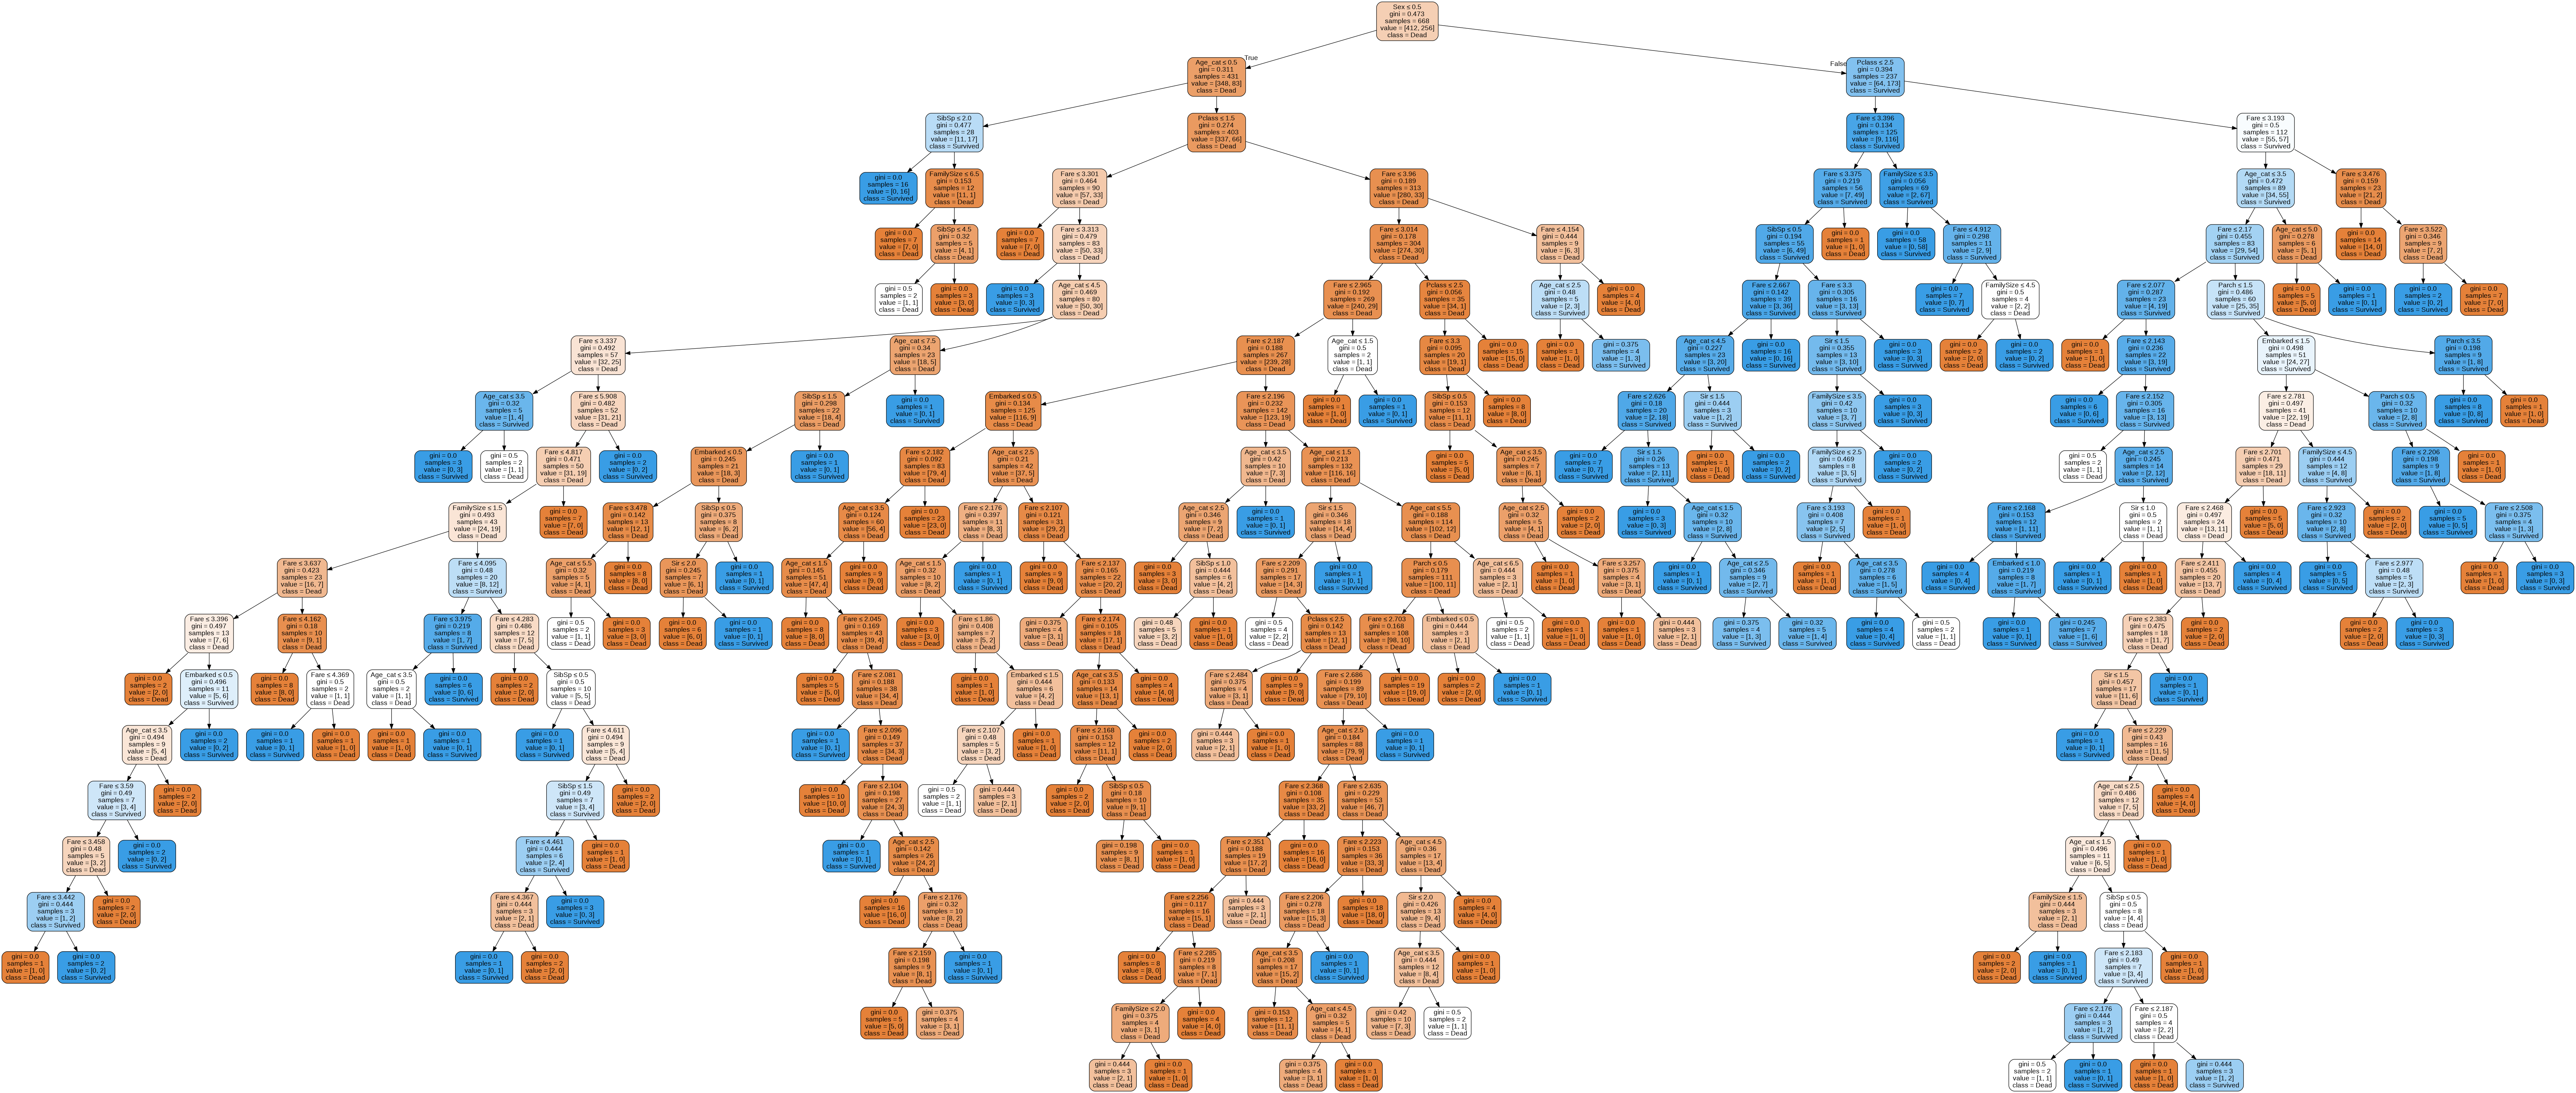

In [195]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

## 랜덤 포레스트

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [197]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

In [198]:
print("정확도: ", accuracy_score(y_test, pred))

정확도:  0.8475336322869955


## XGBoost

In [199]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [200]:
xgb_clf = XGBClassifier(n_estimators = 500) #트리의 개수
params = { #트리 파라미터
    "max_depth" : [5, 7, 9, 11],
    "min_child_weight" : [1, 3, 5, 7],
    "colsample_bytree" : [0.5, 0.75, 1.0]
}

In [201]:
gridcv = GridSearchCV(xgb_clf, param_grid = params) #최적의 파라미터를 찾고, 이를 포함하는 SGBoost 객체를 생성하는 객체

In [202]:
gridcv.fit(X_train, y_train, 
           early_stopping_rounds = 30,
           eval_metric = "error",
           eval_set = [(X_train, y_train), (X_test, y_test)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[7]	validation_0-error:0.146707	validation_1-error:0.179372
[8]	validation_0-error:0.148204	validation_1-error:0.174888
[9]	validation_0-error:0.14521	validation_1-error:0.174888
[10]	validation_0-error:0.142216	validation_1-error:0.170404
[11]	validation_0-error:0.142216	validation_1-error:0.170404
[12]	validation_0-error:0.143713	validation_1-error:0.170404
[13]	validation_0-error:0.14521	validation_1-error:0.170404
[14]	validation_0-error:0.136228	validation_1-error:0.165919
[15]	validation_0-error:0.136228	validation_1-error:0.165919
[16]	validation_0-error:0.136228	validation_1-error:0.179372
[17]	validation_0-error:0.143713	validation_1-error:0.170404
[18]	validation_0-error:0.142216	validation_1-error:0.161435
[19]	validation_0-error:0.142216	validation_1-error:0.161435
[20]	validation_0-error:0.143713	validation_1-error:0.165919
[21]	validation_0-error:0.142216	validation_1-error:0.161435
[22]	validation_0-error:0.140719	validation_1-error:0.

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.75, 1.0],
                         'max_depth': [5, 7, 9, 11],
                         'min_child_weight': [1, 3, 5, 7]}

In [204]:
print("GridSearchCv 최적 파라미터: ",gridcv.best_params_ )

GridSearchCv 최적 파라미터:  {'colsample_bytree': 1.0, 'max_depth': 7, 'min_child_weight': 3}


In [205]:
from xgboost import plot_importance

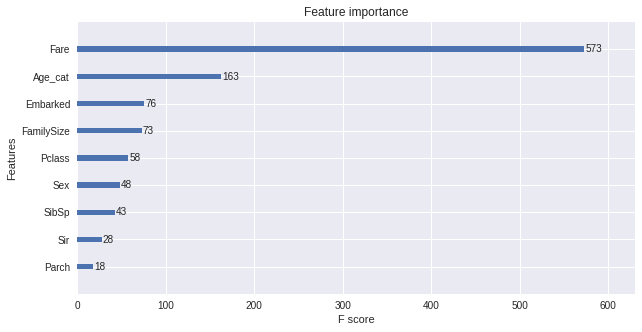

In [207]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(gridcv.best_estimator_, ax = ax)

In [208]:
pred = gridcv.predict(X_test)

### 모델 성능 평가

In [210]:
confusion_matrix(y_test, pred)

array([[125,  12],
       [ 17,  69]])

In [211]:
accuracy_score(y_test, pred)

0.8699551569506726